In [27]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('Train_SU63ISt.csv')
test = pd.read_csv('Test_0qrQsBZ.csv')

In [4]:
train_original = train.copy()
test_original = test.copy()

In [6]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [14]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

In [15]:
for i in (train,test,train_original,test_original):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

In [19]:
train['day_of_week'] = train.Datetime.dt.dayofweek

In [22]:
def function(dt):
    if dt.dayofweek>4:
        return 1
    else:
        return 0
temp2 = train['Datetime'].apply(function)
train['weekend'] = temp2

In [23]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day_of_week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


Text(0, 0.5, 'Count')

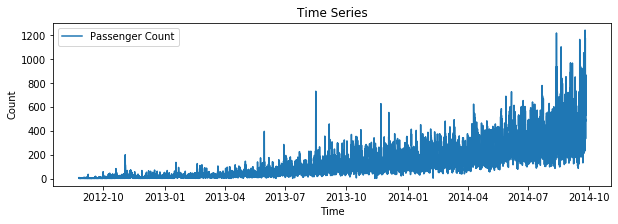

In [35]:
train.index=train.Datetime
df=train.drop('ID',axis = 1)
train.head()
co = df.Count
fig = plt.figure(figsize = (10,3))
plt.plot(co,label = 'Passenger Count')
plt.legend()
plt.title('Time Series')
plt.xlabel('Time')
plt.ylabel('Count')